In [1]:
import re

def parse_file(file_path):
    # Open the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Parse the file content
    parsed_data = []
    for line in lines:
        # Ignore lines that start with '#'
        if not line.startswith('#'):
            parts = line.split()
            line_id = parts[0]
            transcription = parts[8:]
            words = []
            # Remove '|' character and join the transcription words
            for sub in transcription:
                words +=sub.split('|')
            parsed_data.append((line_id, words))

    return parsed_data

In [2]:
from torch.utils.data import Dataset
from torchvision.io import read_image
import os

class IAMDatabase(Dataset):
    def __init__(self, image_labels, img_dir) -> None:
        self.image_labels = image_labels
        self.img_dir = img_dir

    def __len__(self):
        return len(self.image_labels)
    
    def __getitem__(self, index):
        line_id, words_list = self.image_labels[index]
        img_path = os.path.join(self.img_dir, f'{line_id}.png')
        image = read_image(img_path)

        return image, words_list


In [3]:
file_path = 'data/ascii/lines.txt'
parsed_data = parse_file(file_path)

for line_id, transcription in parsed_data[:10]:
    print(line_id, transcription)

a01-000u-00 ['A', 'MOVE', 'to', 'stop', 'Mr.', 'Gaitskell', 'from']
a01-000u-01 ['nominating', 'any', 'more', 'Labour', 'life', 'Peers']
a01-000u-02 ['is', 'to', 'be', 'made', 'at', 'a', 'meeting', 'of', 'Labour']
a01-000u-03 ['M', 'Ps', 'tomorrow', '.', 'Mr.', 'Michael', 'Foot', 'has']
a01-000u-04 ['put', 'down', 'a', 'resolution', 'on', 'the', 'subject']
a01-000u-05 ['and', 'he', 'is', 'to', 'be', 'backed', 'by', 'Mr.', 'Will']
a01-000u-06 ['Griffiths', ',', 'M', 'P', 'for', 'Manchester', 'Exchange', '.']
a01-000x-00 ['A', 'MOVE', 'to', 'stop', 'Mr.', 'Gaitskell', 'from', 'nominating']
a01-000x-01 ['any', 'more', 'Labour', 'life', 'Peers', 'is', 'to', 'be', 'made', 'at', 'a']
a01-000x-02 ['meeting', 'of', 'Labour', '0M', 'Ps', 'tomorrow', '.', 'Mr.', 'Michael']


Total images in the dataset: 13353

['A', 'MOVE', 'to', 'stop', 'Mr.', 'Gaitskell', 'from']


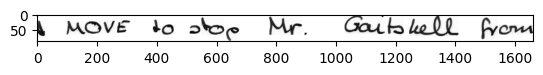

['nominating', 'any', 'more', 'Labour', 'life', 'Peers']


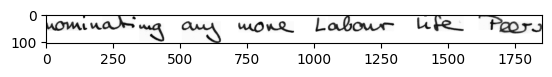

['is', 'to', 'be', 'made', 'at', 'a', 'meeting', 'of', 'Labour']


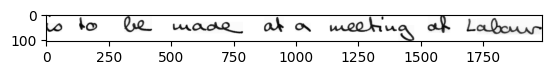

In [4]:
import matplotlib.pyplot as plt 

dataset = IAMDatabase(parsed_data, 'data/img_lines')

print(f'Total images in the dataset: {len(dataset)}\n')

for i in range(3):
    image, words_list = dataset[i]
    print(words_list)
    plt.imshow(image.permute(1, 2, 0), cmap='gray')
    plt.show()


## Data analysis

##### Words per line statistics

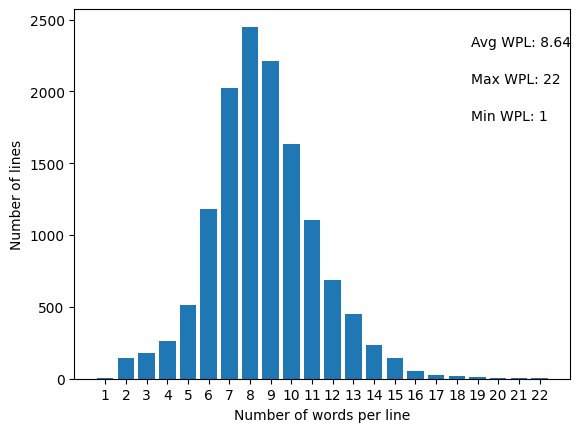

In [5]:
import numpy as np
from collections import Counter

# Average, min, max number of words per line
# Also statistics on the different number of words per line as bar plot
words_per_line = [len(words_list) for _, words_list in parsed_data]
mean_words_per_line = np.mean(words_per_line).round(2)
max_words_per_line = np.max(words_per_line)
min_words_per_line = np.min(words_per_line)

# frequency of the different number of words per line
words_per_line_counter = Counter(words_per_line)
words_per_line_counter = dict(sorted(words_per_line_counter.items()))

# plot the counter as bar
plt.bar(words_per_line_counter.keys(), words_per_line_counter.values())
plt.xticks(list(words_per_line_counter.keys()))
plt.xlabel('Number of words per line')
plt.ylabel('Number of lines')

plt.text(0.8, 0.9, f'Avg WPL: {mean_words_per_line}', transform=plt.gca().transAxes)
plt.text(0.8, 0.8, f'Max WPL: {max_words_per_line}', transform=plt.gca().transAxes)
plt.text(0.8, 0.7, f'Min WPL: {min_words_per_line}', transform=plt.gca().transAxes)
plt.show()

##### Words length statistics

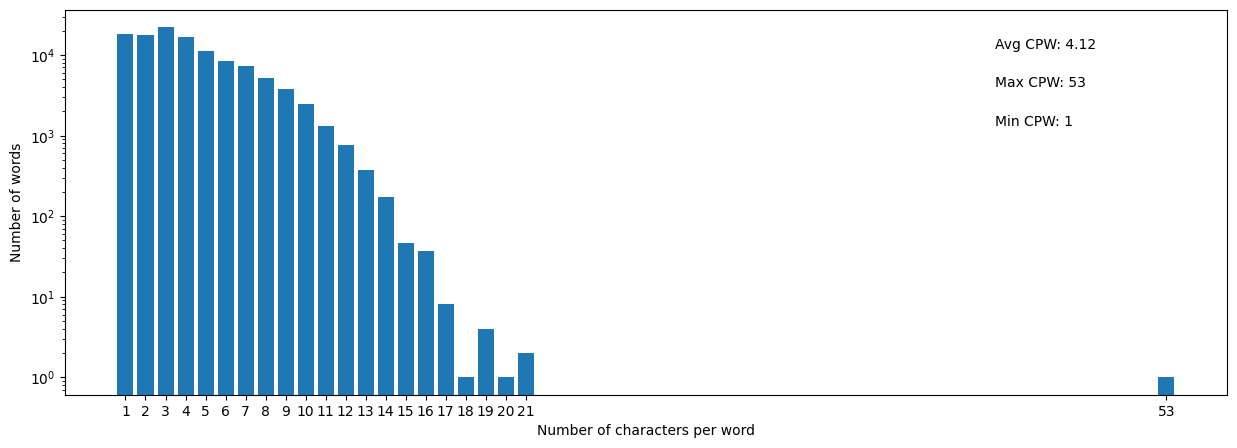

In [6]:
# average, min, max number of characters per word
# also statistics on the frequence of different word lenghts as bar plot
characters_per_word = [len(word) for _, words_list in parsed_data for word in words_list]

mean_characters_per_word = np.mean(characters_per_word).round(2)
max_characters_per_word = np.max(characters_per_word)
min_characters_per_word = np.min(characters_per_word)

# frequency of the different number of characters per word
characters_per_word_counter = Counter(characters_per_word)
characters_per_word_counter = dict(sorted(characters_per_word_counter.items()))

# use log scale for y axis
plt.figure(figsize=(15, 5))
plt.bar(characters_per_word_counter.keys(), characters_per_word_counter.values(), log=True)
plt.xticks(list(characters_per_word_counter.keys()))
plt.xlabel('Number of characters per word')
plt.ylabel('Number of words')

plt.text(0.8, 0.9, f'Avg CPW: {mean_characters_per_word}', transform=plt.gca().transAxes)
plt.text(0.8, 0.8, f'Max CPW: {max_characters_per_word}', transform=plt.gca().transAxes)
plt.text(0.8, 0.7, f'Min CPW: {min_characters_per_word}', transform=plt.gca().transAxes)
plt.show()

##### Most frequent words

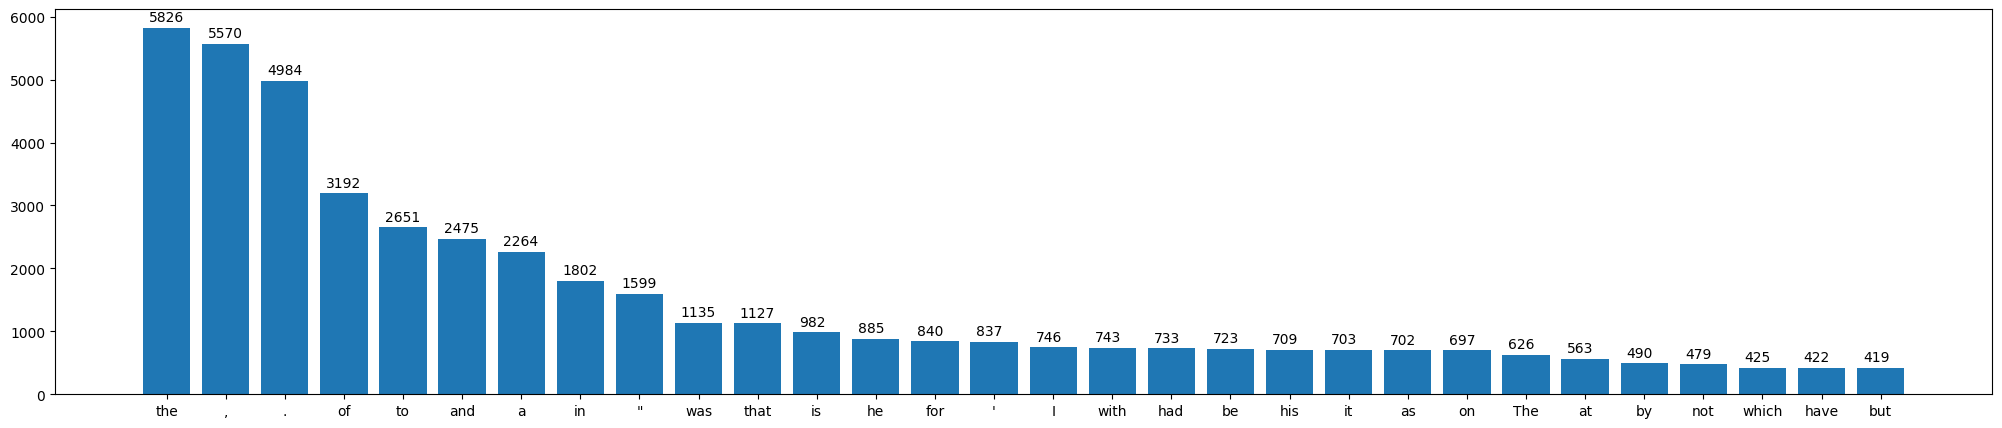

In [7]:
# find the most frequent words
words = [word for _, words_list in parsed_data for word in words_list]
words_counter = Counter(words)
most_frequent_words = words_counter.most_common(30)

# plot the most frequent words
plt.figure(figsize=(25, 5))
plt.bar([word[0] for word in most_frequent_words], [word[1] for word in most_frequent_words])

# plot the frequency of the most frequent words on top of the bars
for i, word in enumerate(most_frequent_words):
    plt.text(i-0.3, word[1]+100, word[1])

##### Least frequent words

<BarContainer object of 10 artists>

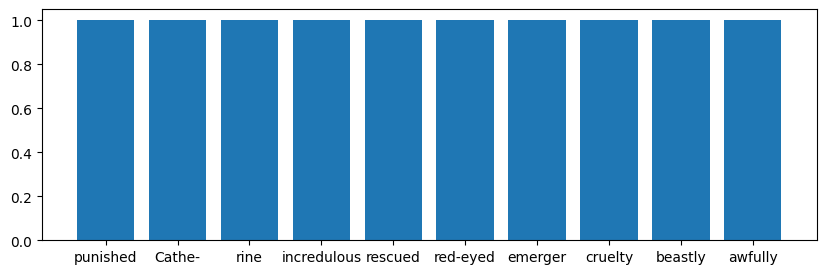

In [8]:
# 10 least frequent words
least_frequent_words = words_counter.most_common()[-11:-1]
plt.figure(figsize=(10, 3))
plt.bar([word[0] for word in least_frequent_words], [word[1] for word in least_frequent_words])

##### Most frequent pairs of words

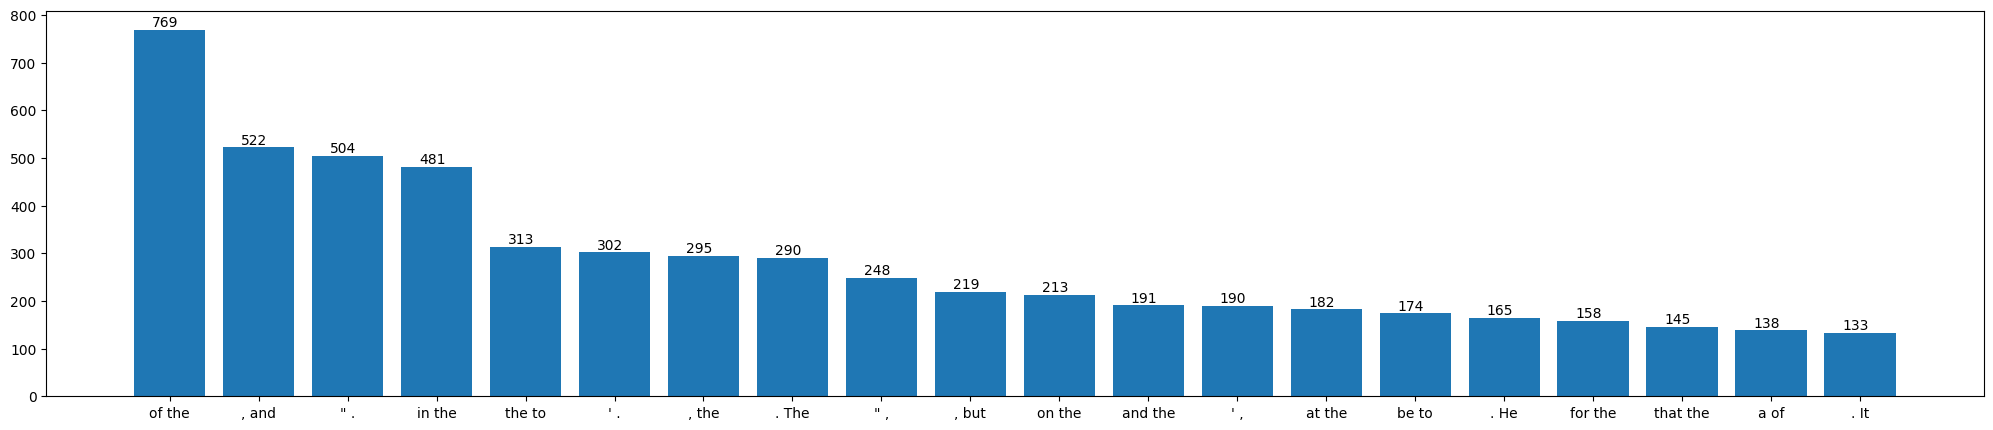

In [9]:
# most frequent pair of words, so that the order of words in the pair is not important
words_pairs = [tuple(words_list[i:i+2]) for _, words_list in parsed_data for i in range(len(words_list)-1)]
words_pairs_counter = Counter([tuple(sorted(pair)) for pair in words_pairs])
most_frequent_words_pairs = words_pairs_counter.most_common(20)

# plot the most frequent words pairs with their count on top of the bar
plt.figure(figsize=(25, 5))
plt.bar([' '.join(pair) for pair, _ in most_frequent_words_pairs], [count for _, count in most_frequent_words_pairs])
for i, (_, count) in enumerate(most_frequent_words_pairs):
    plt.text(i-0.2, count+7, count)

##### Least freqent words pairs


<BarContainer object of 19 artists>

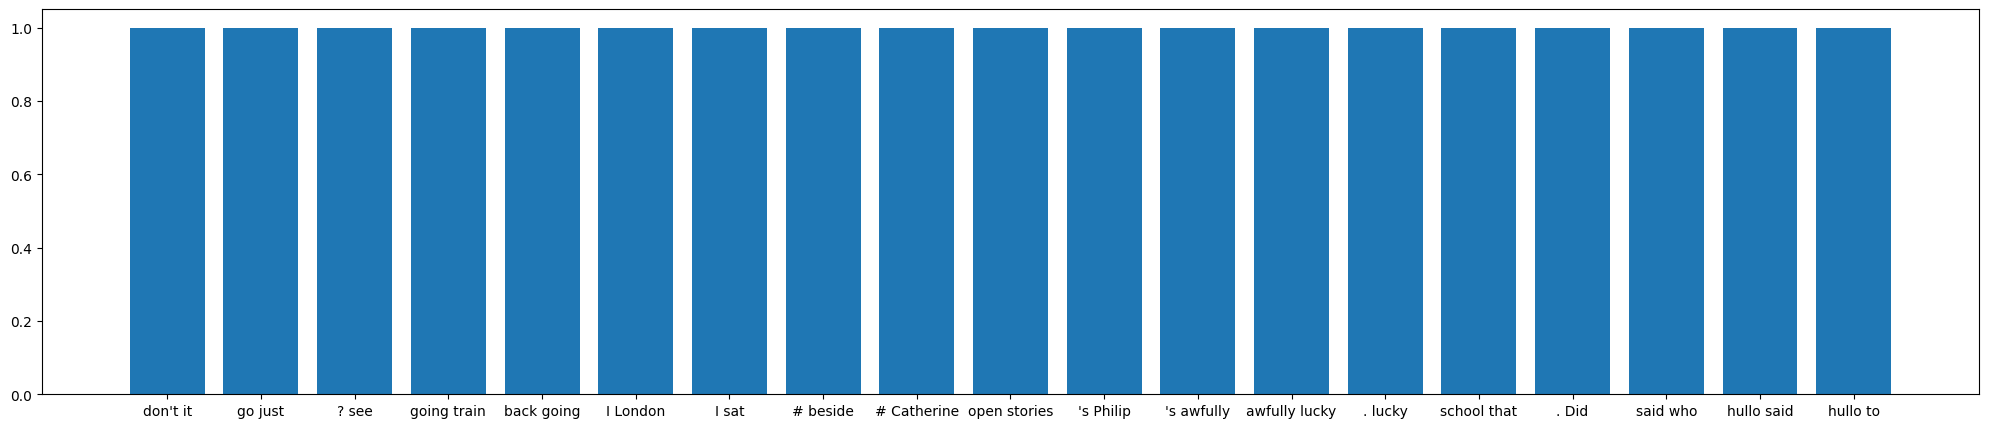

In [10]:
least_frequent_words_pairs = words_pairs_counter.most_common()[-20:-1]
plt.figure(figsize=(25, 5))
plt.bar([' '.join(pair) for pair, _ in least_frequent_words_pairs], [count for _, count in least_frequent_words_pairs])

##### Characters frequency

Text(0, 0.5, 'Number of occurences')

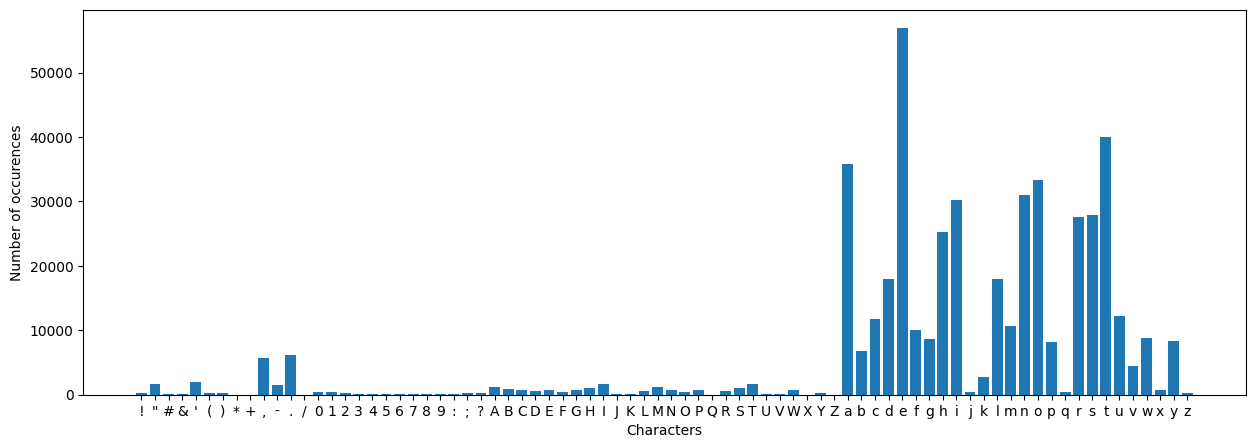

In [11]:
# frequency of the different characters
characters_counter = Counter(''.join(words))
characters_counter = dict(sorted(characters_counter.items()))
plt.figure(figsize=(15, 5))
plt.bar(characters_counter.keys(), characters_counter.values())
plt.xticks(list(characters_counter.keys()))
plt.xlabel('Characters')
plt.ylabel('Number of occurences')

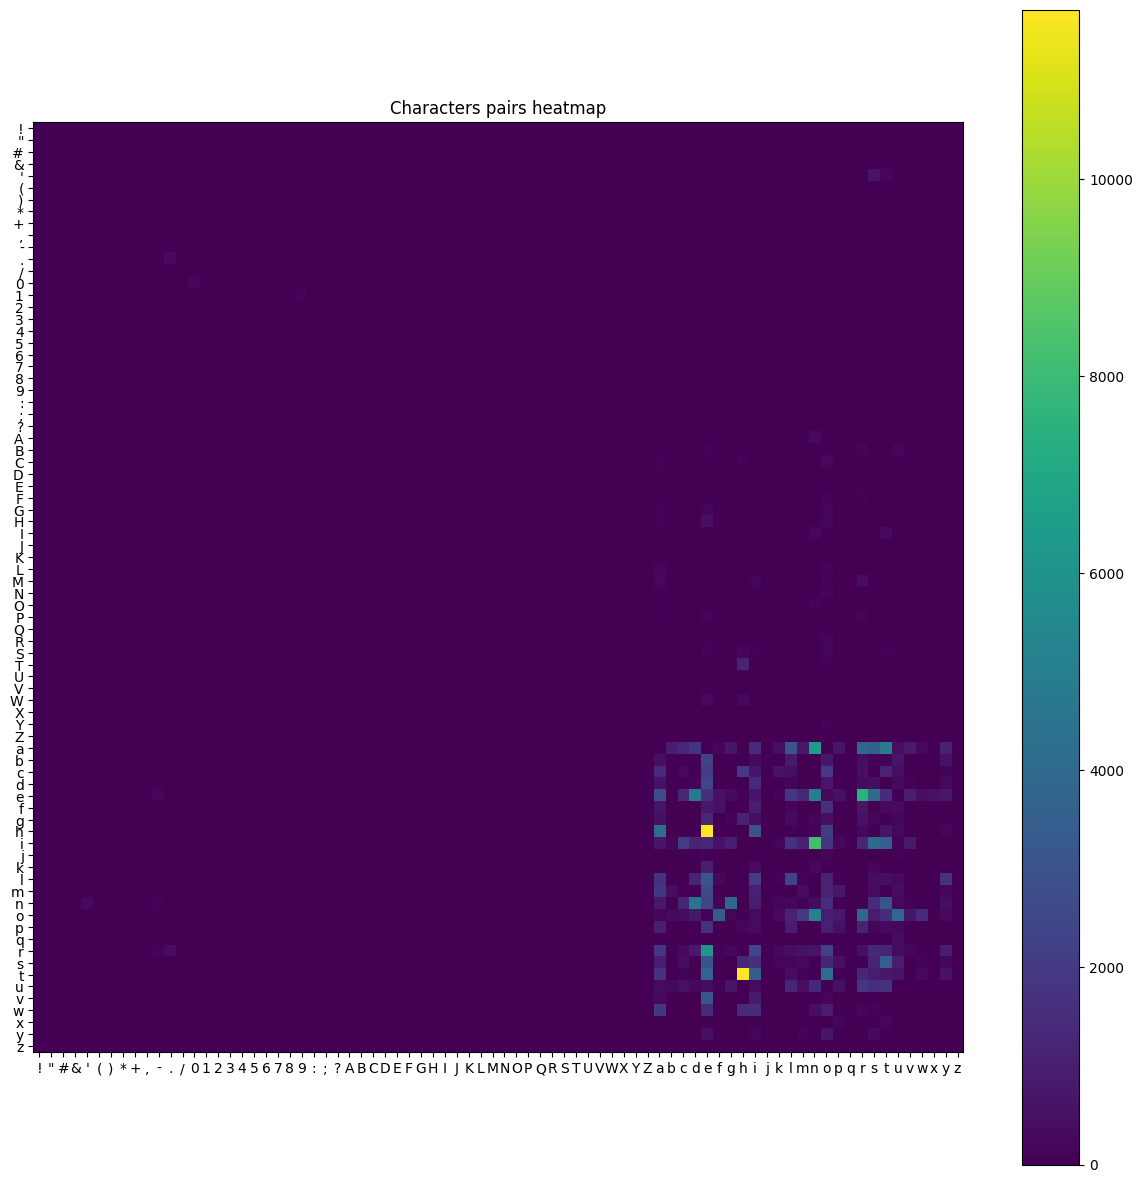

In [12]:
# most frequent characters pairs
characters_pairs = [tuple(word[i:i+2]) for word in words for i in range(len(word)-1)]
characters_pairs_counter = Counter(characters_pairs)

most_frequent_characters_pairs = characters_pairs_counter.most_common(10)
least_frequent_characters_pairs = characters_pairs_counter.most_common()[-11:-1]

characters_pairs_counter = dict(sorted(characters_pairs_counter.items()))

# heatmap where the x and y axis are the characters and the value is the frequency of the pair
characters_pairs_matrix = np.zeros((len(characters_counter), len(characters_counter)))
for i, char1 in enumerate(characters_counter.keys()):
    for j, char2 in enumerate(characters_counter.keys()):
        characters_pairs_matrix[i, j] = characters_pairs_counter.get((char1, char2), 0)

plt.figure(figsize=(15, 15))
plt.imshow(characters_pairs_matrix)
plt.title('Characters pairs heatmap')
plt.xticks(range(len(characters_counter)), list(characters_counter.keys()))
plt.yticks(range(len(characters_counter)), list(characters_counter.keys()))
plt.colorbar()
plt.show()

<BarContainer object of 10 artists>

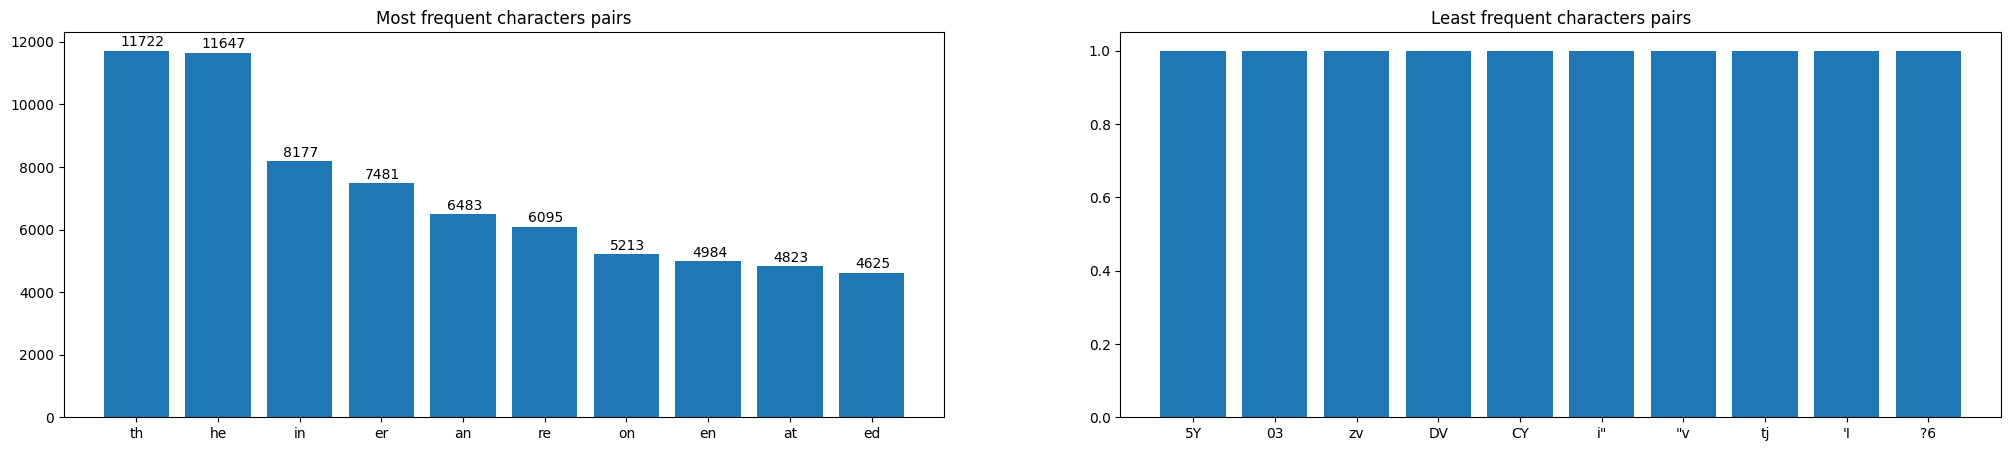

In [14]:
# most frequent and least frequent characters pairs
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.title('Most frequent characters pairs')
plt.bar([''.join(pair) for pair, _ in most_frequent_characters_pairs], [count for _, count in most_frequent_characters_pairs])

for i, (_, count) in enumerate(most_frequent_characters_pairs):
    plt.text(i-0.2, count+150, count)

plt.subplot(1, 2, 2)
plt.title('Least frequent characters pairs')
plt.bar([''.join(pair) for pair, _ in least_frequent_characters_pairs], [count for _, count in least_frequent_characters_pairs])